# San Francisco Metrosu BART projesi

Burada hangi istasyondan en fazla yolcu
taşındığını ve günün hangi saatinde yolculuk yaparsanız bir koltukta
oturarak yolculuk yapabileceğinizi hesaplayacaksınız. ve aşağıdaki
sorulara cevap vereceksiniz

<img src='sanfranciscometro.jpg'>

In [90]:
##Kütüphanalerin Yüklenmesi
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

In [104]:
df1=pd.read_csv(".\data\date-hour-soo-dest-2023.csv",
                names=['Date','Hour','Origin Station','Destination Station','Trip Count'])
df2=pd.read_csv(".\data\date-hour-soo-dest-2022.csv",
               names=['Date','Hour','Origin Station','Destination Station','Trip Count']
               )
df=pd.concat([df1,df2])

#df=pd.read_csv(".\data\date-hour-soo-dest-2022.csv",
#              names=['Date','Hour','Origin Station','Destination Station','Trip Count']
#              )

In [111]:
df=df.drop(labels=0)

In [112]:
df.head()

Date Hour Origin Station Destination Station Trip Count
1  2023-01-01    0           12TH                12TH          1
2  2023-01-01    0           12TH                16TH          1
3  2023-01-01    0           12TH                19TH          2
4  2023-01-01    0           12TH                24TH          3
5  2023-01-01    0           12TH                ASHB          2

In [113]:
df.Date.value_counts()

2022-09-22    26822
2022-09-15    26793
2022-09-30    26624
2022-09-28    26619
2022-09-29    26603
              ...  
2022-01-01    13789
2022-01-09    13440
2022-01-16    13438
2022-01-02    13269
2022-12-25    12367
Name: Date, Length: 426, dtype: int64

In [18]:
df.shape

(8245369, 5)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9621530 entries, 1 to 8245369
Data columns (total 5 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   Date                 object
 1   Hour                 object
 2   Origin Station       object
 3   Destination Station  object
 4   Trip Count           object
dtypes: object(5)
memory usage: 440.4+ MB


In [116]:
station_coords=pd.read_csv(".\data\station_coords.csv").drop("Unnamed: 0",axis=1)

In [117]:
station_coords=station_coords.drop("Unnamed: 1",axis=1)

In [118]:
station_coords.sample(4)

station_name  latitute  longitude
32         LAFY      1055        444
49         RICH       611        310
35         CONC      1295        294
42         DUBL      1655       1085

In [119]:
station_coords[["station_name","latitute","longitude"]].sample(4)

station_name  latitute  longitude
34         PHIL      1225        337
22         BAYF      1075       1105
9          GLEN       339       1023
28         MLPT      1525       1765

# Question A: Compute the straight line distance between every station

In [120]:
station_coords.columns=["Origin Station","o_latitute","o_longitude"]

In [122]:
df=pd.merge(df,station_coords)

In [127]:
station_coords.columns=["Destination Station","d_latitute","d_longitude"]

In [128]:
df=pd.merge(df,station_coords)

In [129]:
df.head()

Date Hour Origin Station Destination Station Trip Count  o_latitute  \
0  2023-01-01    0           12TH                12TH          1         798   
1  2023-01-01    1           12TH                12TH         11         798   
2  2023-01-01    2           12TH                12TH          2         798   
3  2023-01-01    6           12TH                12TH          5         798   
4  2023-01-01    7           12TH                12TH          1         798   

   o_longitude  d_latitute  d_longitude  
0          702         798          702  
1          702         798          702  
2          702         798          702  
3          702         798          702  
4          702         798          702

In [130]:
df.shape

(9621530, 9)

In [133]:
R = 6373.0 #km cinsinden yaklaşık dünyanın yarıçapı

In [134]:
lat1=df["o_latitute"]
lon1=df["o_longitude"]
lat2=df["d_latitute"]
lon2=df["d_longitude"]

dlon=(lon2-lon1).astype(float)
dlat=(lat2-lat1).astype(float)

a=np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
df["distance"]=distance

In [135]:
df_distance_table=df[["Origin Station","Destination Station","distance"]].drop_duplicates().reset_index(drop=True)

In [136]:
df_distance_table=df_distance_table[df_distance_table["distance"]!=0]

In [137]:
import networkx as nx
df_distance_table=nx.from_pandas_edgelist(df,source="Origin Station",target="Destination Station",edge_attr=True)

In [138]:
df_distance_table.nodes()

NodeView(('12TH', '16TH', '19TH', '24TH', 'ANTC', 'ASHB', 'BALB', 'BAYF', 'BERY', 'CAST', 'CIVC', 'COLM', 'COLS', 'CONC', 'DALY', 'DBRK', 'DELN', 'DUBL', 'EMBR', 'FRMT', 'FTVL', 'GLEN', 'HAYW', 'LAFY', 'LAKE', 'MCAR', 'MLBR', 'MLPT', 'MONT', 'NBRK', 'NCON', 'OAKL', 'PCTR', 'PHIL', 'PITT', 'PLZA', 'POWL', 'RICH', 'ROCK', 'SANL', 'SBRN', 'SFIA', 'SHAY', 'SSAN', 'UCTY', 'WARM', 'WCRK', 'WOAK', 'ORIN', 'WDUB'))

In [143]:
df_distance_table.edges()

EdgeView([('12TH', '12TH'), ('12TH', '16TH'), ('12TH', '19TH'), ('12TH', '24TH'), ('12TH', 'ANTC'), ('12TH', 'ASHB'), ('12TH', 'BALB'), ('12TH', 'BAYF'), ('12TH', 'BERY'), ('12TH', 'CAST'), ('12TH', 'CIVC'), ('12TH', 'COLM'), ('12TH', 'COLS'), ('12TH', 'CONC'), ('12TH', 'DALY'), ('12TH', 'DBRK'), ('12TH', 'DELN'), ('12TH', 'DUBL'), ('12TH', 'EMBR'), ('12TH', 'FRMT'), ('12TH', 'FTVL'), ('12TH', 'GLEN'), ('12TH', 'HAYW'), ('12TH', 'LAFY'), ('12TH', 'LAKE'), ('12TH', 'MCAR'), ('12TH', 'MLBR'), ('12TH', 'MLPT'), ('12TH', 'MONT'), ('12TH', 'NBRK'), ('12TH', 'NCON'), ('12TH', 'OAKL'), ('12TH', 'PCTR'), ('12TH', 'PHIL'), ('12TH', 'PITT'), ('12TH', 'PLZA'), ('12TH', 'POWL'), ('12TH', 'RICH'), ('12TH', 'ROCK'), ('12TH', 'SANL'), ('12TH', 'SBRN'), ('12TH', 'SFIA'), ('12TH', 'SHAY'), ('12TH', 'SSAN'), ('12TH', 'UCTY'), ('12TH', 'WARM'), ('12TH', 'WCRK'), ('12TH', 'WOAK'), ('12TH', 'ORIN'), ('12TH', 'WDUB'), ('16TH', '16TH'), ('16TH', '19TH'), ('16TH', '24TH'), ('16TH', 'ANTC'), ('16TH', 'ASHB'), 

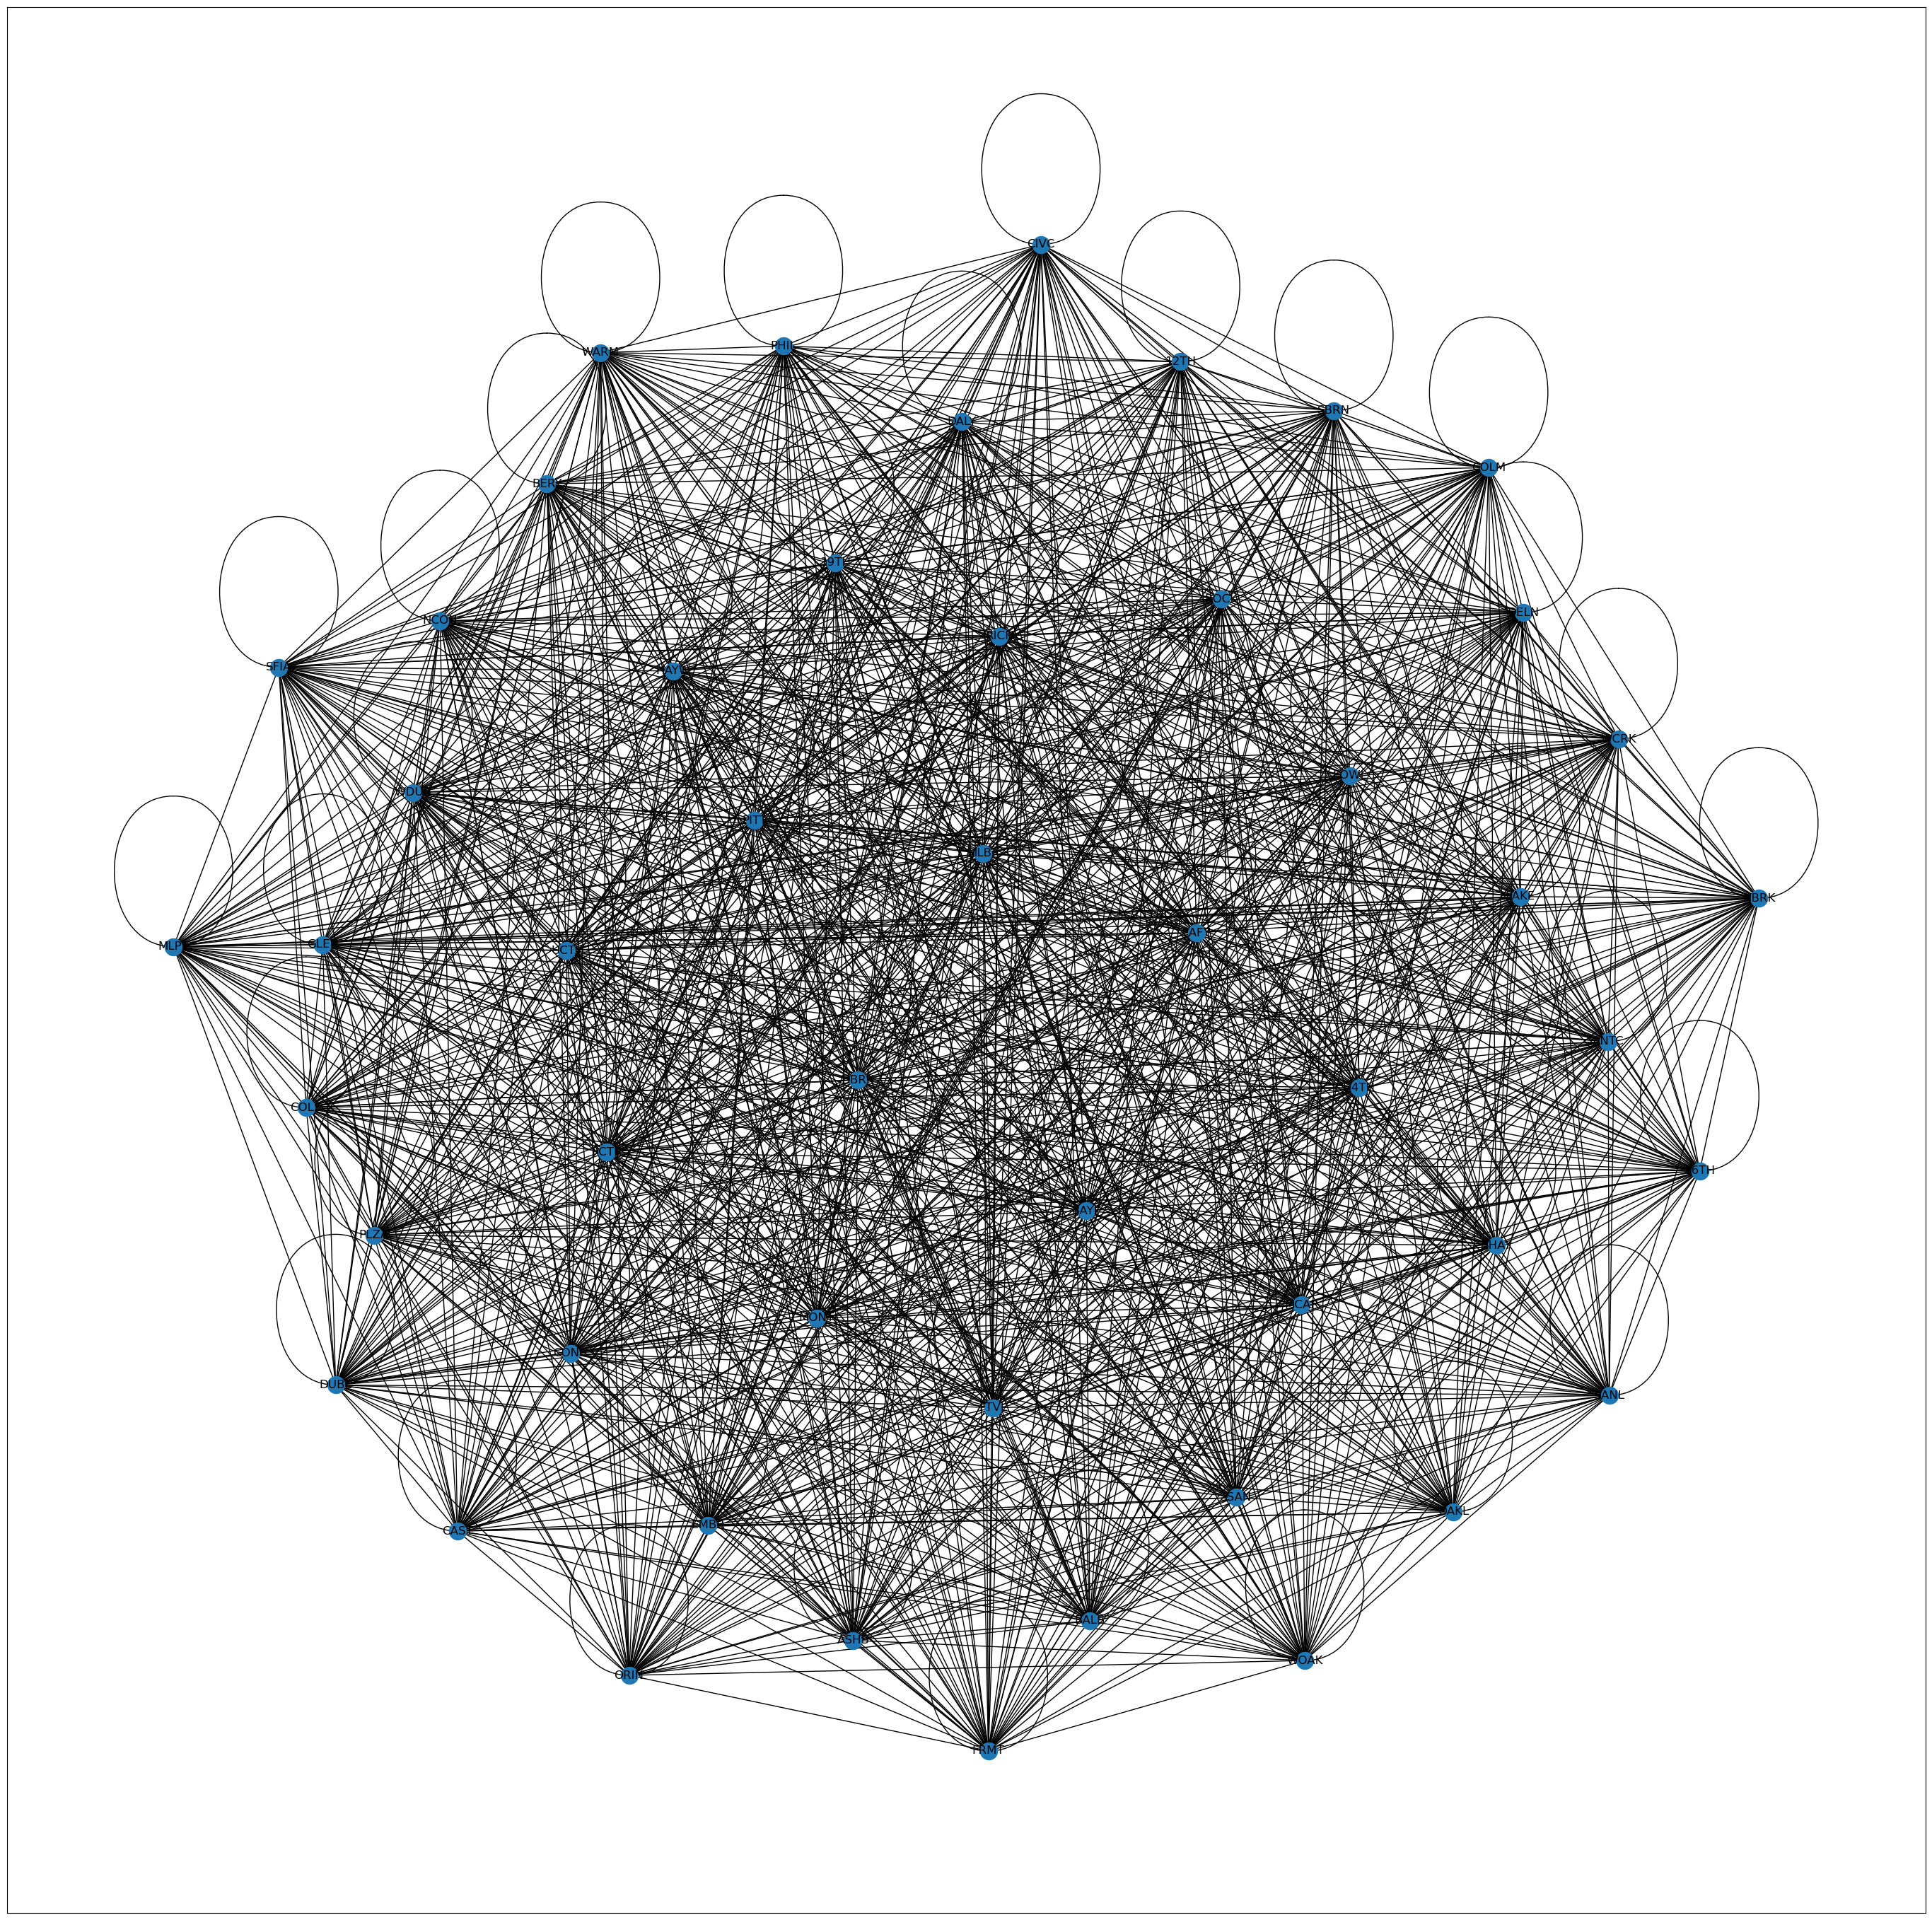

In [145]:
plt.figure(figsize=(35,35))
nx.draw_networkx(df_distance_table,with_labels=True)

In [146]:
df=df.drop(["o_latitute","o_longitude","d_latitute","d_longitude"],axis=1)

In [147]:
df["Date"]=pd.to_datetime(df['Date'])

df["Day"]=df["Date"].dt.dayofweek
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year


df['WeekDay']=df['Date'].dt.day_name()
df['Month_Name']=df['Date'].dt.month_name()

df.drop("Date",axis=1,inplace=True)

In [148]:
df.head()

Hour Origin Station Destination Station Trip Count  distance  Day  Month  \
0    0           12TH                12TH          1       0.0    6      1   
1    1           12TH                12TH         11       0.0    6      1   
2    2           12TH                12TH          2       0.0    6      1   
3    6           12TH                12TH          5       0.0    6      1   
4    7           12TH                12TH          1       0.0    6      1   

   Year WeekDay Month_Name  
0  2023  Sunday    January  
1  2023  Sunday    January  
2  2023  Sunday    January  
3  2023  Sunday    January  
4  2023  Sunday    January

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9621530 entries, 0 to 9621529
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Hour                 int32  
 1   Origin Station       object 
 2   Destination Station  object 
 3   Trip Count           int32  
 4   distance             float64
 5   Day                  int64  
 6   Month                int64  
 7   Year                 int64  
 8   WeekDay              object 
 9   Month_Name           object 
dtypes: float64(1), int32(2), int64(3), object(4)
memory usage: 734.1+ MB


In [156]:
df['Trip Count']=df['Trip Count'].astype(int)

In [158]:
df.describe()

Hour    Trip Count      distance           Day         Month  \
count  9.621530e+06  9.621530e+06  9.621530e+06  9.621530e+06  9.621530e+06   
mean   1.364815e+01  5.126611e+00  9.748038e+03  2.821341e+00  5.919943e+00   
std    5.274804e+00  9.560696e+00  5.038964e+03  1.916486e+00  3.612744e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    9.000000e+00  1.000000e+00  5.882150e+03  1.000000e+00  2.000000e+00   
50%    1.400000e+01  2.000000e+00  9.615185e+03  3.000000e+00  6.000000e+00   
75%    1.800000e+01  5.000000e+00  1.405563e+04  4.000000e+00  9.000000e+00   
max    2.300000e+01  4.930000e+02  1.989522e+04  6.000000e+00  1.200000e+01   

               Year  
count  9.621530e+06  
mean   2.022143e+03  
std    3.501028e-01  
min    2.022000e+03  
25%    2.022000e+03  
50%    2.022000e+03  
75%    2.022000e+03  
max    2.023000e+03

In [159]:
df.corr()

Hour  Trip Count  distance       Day     Month      Year
Hour        1.000000   -0.016989 -0.002189  0.046483  0.001383 -0.001594
Trip Count -0.016989    1.000000 -0.002985 -0.058731  0.028600  0.008820
distance   -0.002189   -0.002985  1.000000 -0.005079 -0.000998 -0.000039
Day         0.046483   -0.058731 -0.005079  1.000000  0.005651 -0.010346
Month       0.001383    0.028600 -0.000998  0.005651  1.000000 -0.494716
Year       -0.001594    0.008820 -0.000039 -0.010346 -0.494716  1.000000

<AxesSubplot:>

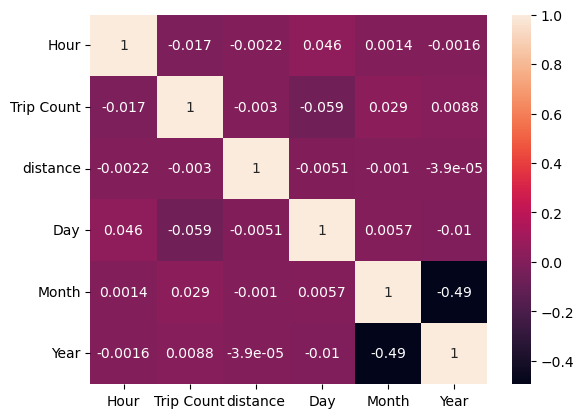

In [160]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Hour', ylabel='count'>

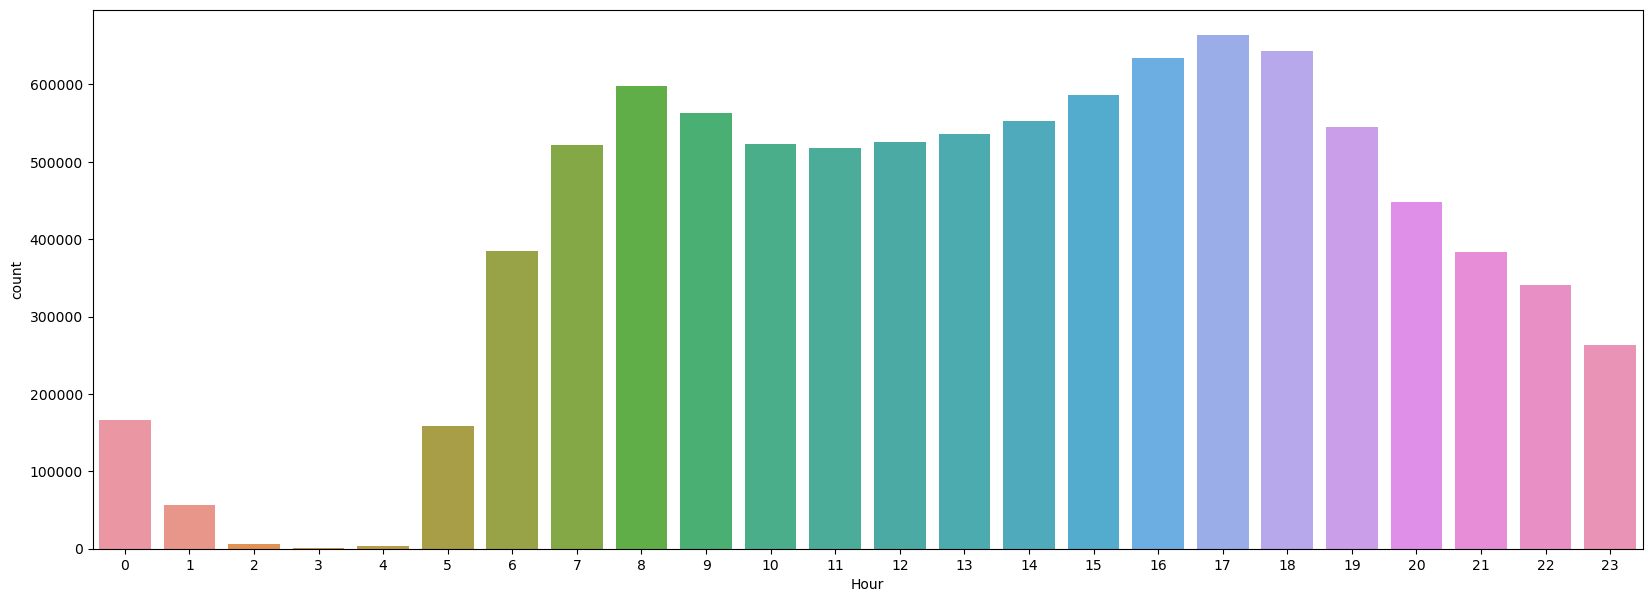

In [161]:
# En çok 17 ve 18 saatlerinde yoğunluk oluşmaktadır.
plt.figure(figsize=(20,7))
sns.countplot(df["Hour"])

<AxesSubplot:xlabel='WeekDay', ylabel='count'>

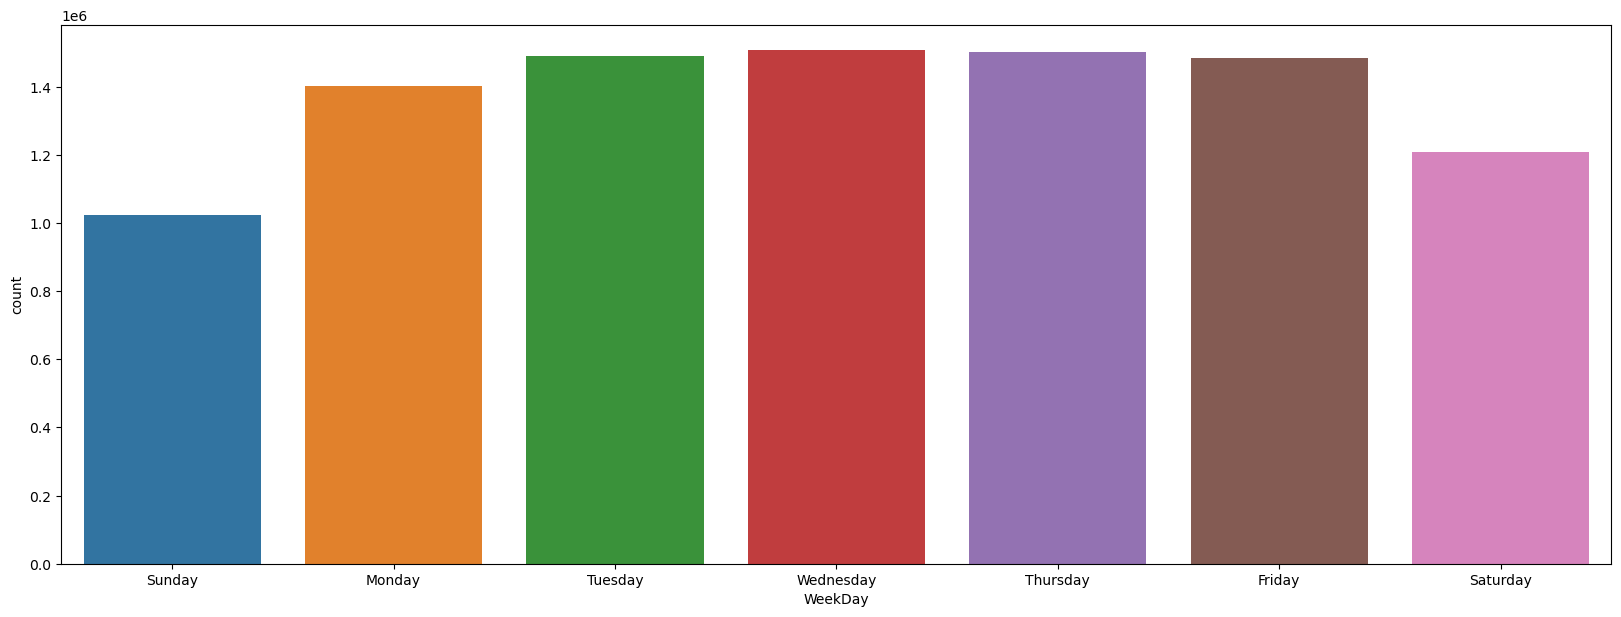

In [162]:
#Hafta içleri yoğunluk ortalama olarak aynı ama hafta sonları yoğunluk düşmüştür.
plt.figure(figsize=(20,7))
sns.countplot(df["WeekDay"])

<AxesSubplot:xlabel='Month_Name', ylabel='count'>

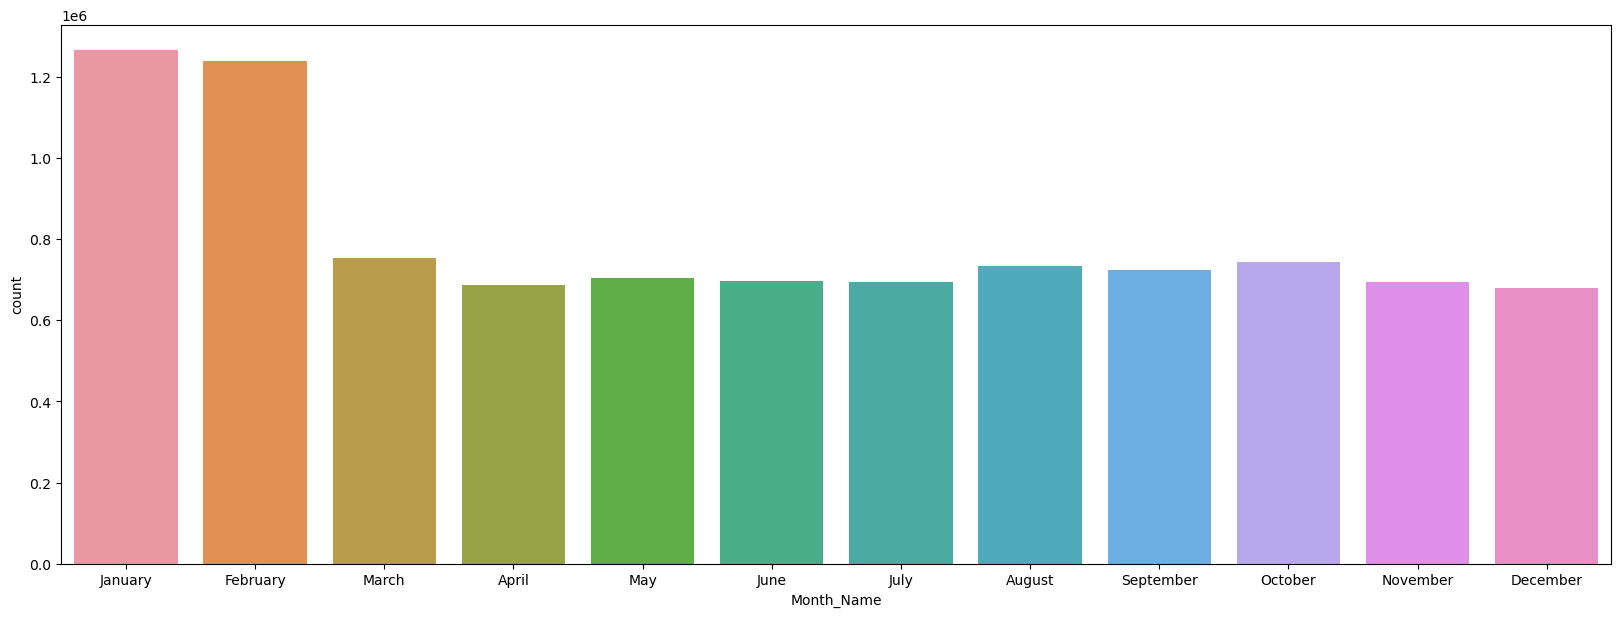

In [163]:
#Ortalama olarak her ay aynı sayıda yolcu taşınmıştır.
plt.figure(figsize=(20,7))
sns.countplot(df["Month_Name"])

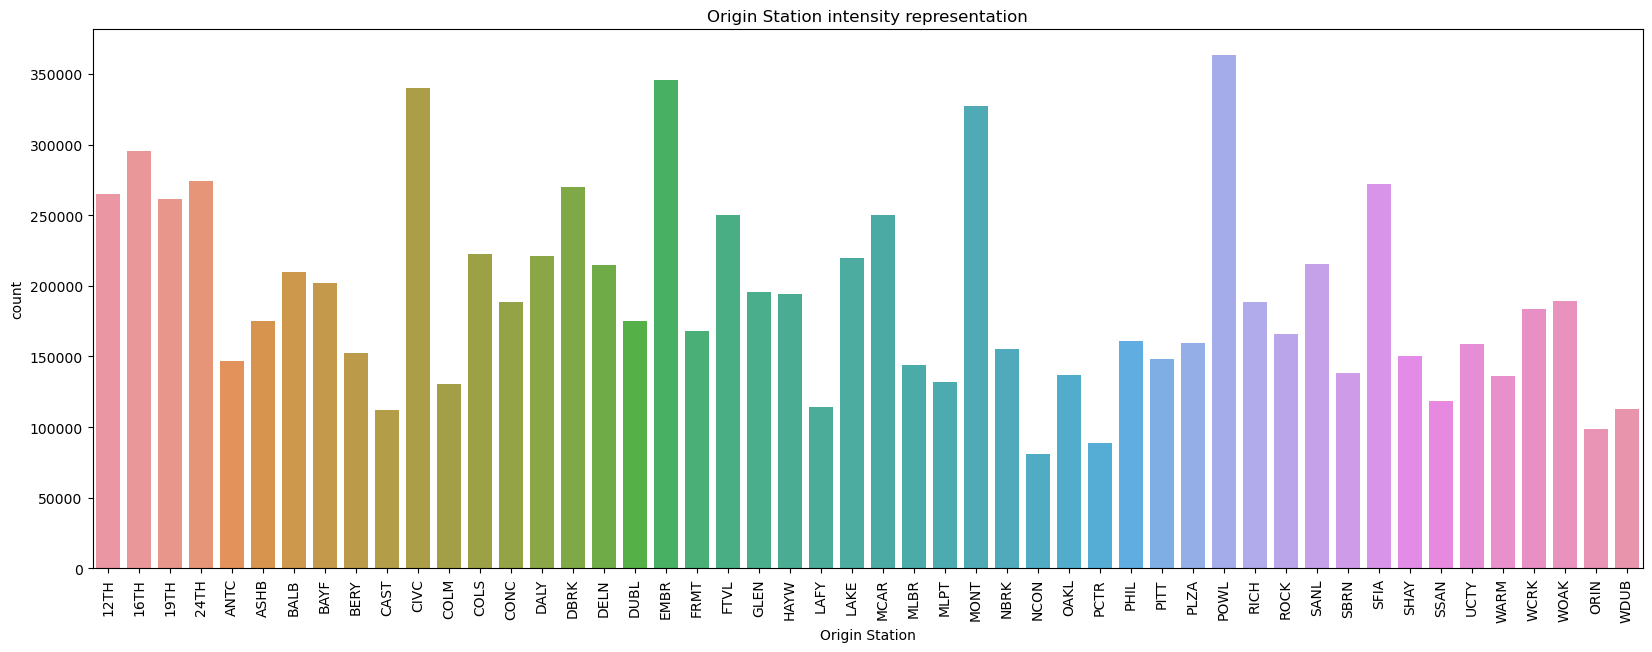

In [164]:
plt.figure(figsize=(20,7))
sns.countplot(df["Origin Station"])
plt.title("Origin Station intensity representation")
plt.xticks(rotation=90);

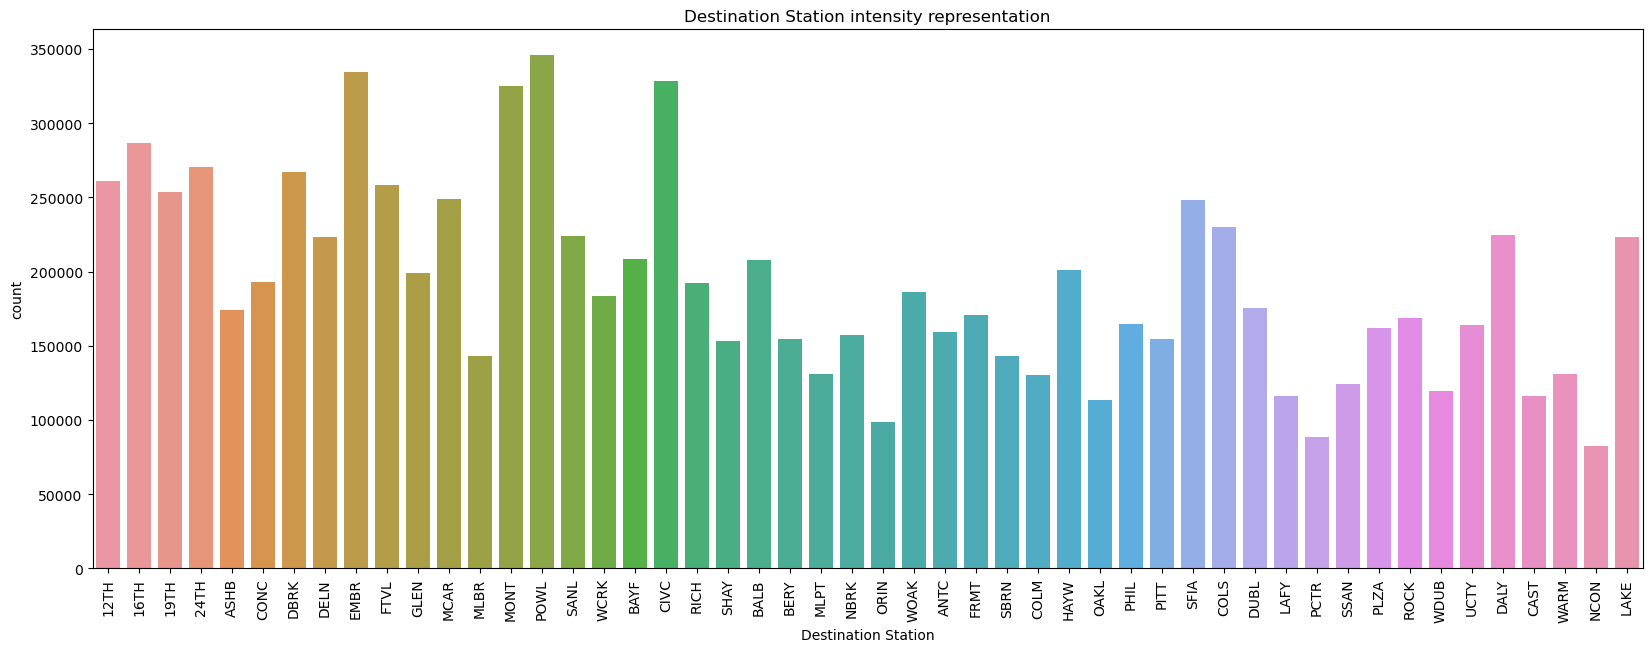

In [165]:
plt.figure(figsize=(20,7))
sns.countplot(df["Destination Station"])
plt.title("Destination Station intensity representation")
plt.xticks(rotation=90);

# Modeling

In [166]:
df_reg=df

In [167]:
df_reg.drop(["Origin Station","Destination Station","WeekDay","Month_Name"],axis=1,inplace=True)

In [168]:
df_reg.sample(5)

Hour  Trip Count      distance  Day  Month  Year
1257842     1           1  15262.821930    4      2  2023
4337738     8           1  12041.458088    4      6  2022
6301561    17           7   8171.185923    2      7  2022
7054983    12           1   6864.115630    5      7  2022
266207      6           6  11737.551948    2      8  2022

In [169]:
x,y=df.drop("Trip Count",axis=1),df[["Trip Count"]]

In [170]:
def fnc_all_regression_modeling(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    
    return result.sort_values('R_Squared',ascending=False)

In [171]:
fnc_all_regression_modeling(x,y)

R_Squared      RMSE       MAE
KNeighborsRegressor         0.405062  7.424213  3.168727
ExtraTreeRegressor          0.399641  7.457959  3.186592
GradientBoostingRegressor   0.115157  9.054151  4.439739
LinearRegression            0.005289  9.599819  4.793063
Ridge                       0.005289  9.599819  4.793063
ElasticNet                  0.003241  9.609697  4.794438
Lasso                       0.000469  9.623050  4.799832

# PyCaret Regression Tahminleme Yapalım

In [172]:
from pycaret.regression import*

In [173]:
exp_name=setup(df_reg,target="Trip Count")

In [ ]:
best_model=compare_models()

Initiated  . . . . . . . . . . . . . . . . . .                 16:32:53
Status     . . . . . . . . . . . . . . . . . .         Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Random Forest Regressor

Processing:   0%|          | 0/81 [00:00<?, ?it/s]